### Author
Alexandre Pereira Santos <br>
alexandre.santos(at)lmu.de

# init
@author: Alexandre Pereira Santos <br>
alexandre.santos(at)lmu.de

## Tasks
- get OpenStreetMap data using the osmnx functionalities in the Overpass API
- clip it to an AOI

## Prerequisites
- have osmnx and geopandas installed
- have an AOI saved as a vector (shapefile or geopackage)

In [2]:
import osmnx as ox
import geopandas as gpd
from pathlib import Path

# imports

In [3]:
#import the AOI
AOI_path = Path(r'D:\\Dropbox\\x\\PostDoc\\23 10 LMU\\13 exp_cases\\24 01 Urban SSP MAN MUM JAK\\GIS_temp\\')
AOI_file = 'MUM_LIM_BoundingBox_AOI_A.shp'
AOI_gdf = gpd.read_file(AOI_path / AOI_file)

In [33]:
#with the code from https://pygis.io/docs/d_access_osm.html
# Get place boundary related to the place name as a geodataframe
place_name = ' Mumbai Metropolitan Region, India'
area = ox.geocode_to_gdf(place_name)

<Axes: >

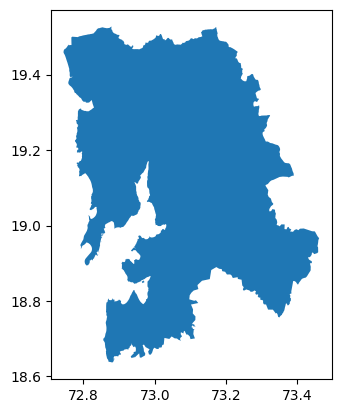

In [35]:
area.plot()

In [58]:
# List key-value pairs for tags
tags = {'highway': ['primary', 'secondary', 'tertiary', 'residential', 'unclassified', 'trunk', 'motorway']}
col_list = ['osmid','name','source','geometry', 'highway','surface','lanes','incline'] #OSM has hundreds of cols, we just want a few. For info, check roads.columns

roads = ox.features_from_place(place_name, tags=tags)
roads.reset_index(inplace=True)

#filtering out the wrong geometries (POLYGON or POINT) and element types (NODE)
roads = roads.loc[(roads.geometry.type=='LineString')&(roads.element_type == 'way'), col_list]
#convert the CRS of roads to the same as AOI
roads.to_crs(AOI_gdf.crs,inplace=True)

roads.shape

#plot them
roads.plot('highway',ax=AOI_gdf.plot(figsize=(10, 10),  alpha=0.5, color='lightgray'),cmap='Paired', linewidth=1, zorder=2)

(58778, 8)

<Axes: >

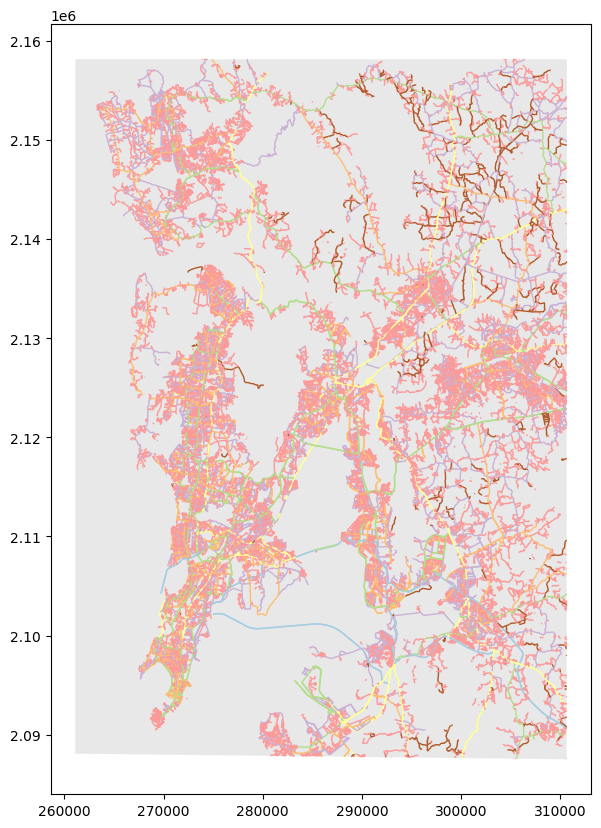

In [67]:
#clip using geopandas, the mask is the AOI we imported above
clipped_gdf = gpd.clip(roads, mask=AOI_gdf, keep_geom_type=True)
clipped_gdf.plot('highway',ax=AOI_gdf.plot(figsize=(10, 10),  alpha=0.5, color='lightgray'),cmap='Paired', linewidth=1, zorder=2)

# export

In [68]:
#export the results to a shapefile
clipped_gdf.to_file(AOI_path / 'MUM_TRA_roads_OSM_2024_L.shp')